<a href="https://colab.research.google.com/github/TTobing3/-/blob/main/%EA%B2%8C%EC%9E%84%20%EB%8F%99%ED%96%A5%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

글로벌문화학부 202103083 박은설
글로벌경영학부 201902102 장태규
글로벌문화학부 201903103 이지영

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [542]:
fileName = 'Steam_Asia_WeeklySellerData.xlsx'
df = pd.read_excel(fileName)

#기초 정보 확인
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3300 non-null   int64 
 1   순위          3300 non-null   int64 
 2   이름          3300 non-null   object
 3   가격          3300 non-null   object
 4   기간          3299 non-null   object
 5   측정 국가       3300 non-null   object
 6   장르          3141 non-null   object
 7   리뷰          3144 non-null   object
 8   출시일         3144 non-null   object
 9   개발사         3144 non-null   object
 10  퍼블리셔        3126 non-null   object
dtypes: int64(2), object(9)
memory usage: 283.7+ KB


,Unnamed: 0,순위,이름,가격,기간,측정 국가,장르,리뷰,출시일,개발사,퍼블리셔
0,0,1,PUBG: BATTLEGROUNDS,0,"For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Adventure,Massively Multiplayer,Free to...","Mixed (2,348,376)","21 Dec, 2017","KRAFTON, Inc.","KRAFTON, Inc."
1,1,2,Palworld,"₩ 32,000","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Adventure,Indie,RPG,Early Access","Very Positive (255,507)","19 Jan, 2024",Pocketpair,Pocketpair
2,2,3,HELLDIVERS™ 2,"₩ 44,800","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of",Action,"Very Positive (315,043)","8 Feb, 2024",Arrowhead Game Studios,PlayStation PC LLC
3,3,4,TEKKEN 8,"₩ 79,800","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of",Action,"Mostly Positive (18,590)","26 Jan, 2024",Bandai Namco Studios Inc.,Bandai Namco Entertainment
4,4,5,Lethal Company,"₩ 11,000","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Adventure,Indie,Early Access","Overwhelmingly Positive (313,879)","24 Oct, 2023",Zeekerss,Zeekerss
5,5,6,Yu-Gi-Oh! Master Duel,0,"For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Simulation,Strategy,Free to Play","Mostly Positive (72,302)","19 Jan, 2022",KONAMI,KONAMI
6,6,7,Granblue Fantasy: Relink,"₩ 69,800","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Adventure,RPG","Very Positive (29,229)","1 Feb, 2024","Cygames, Inc.","Cygames, Inc."
7,7,8,DJMAX RESPECT V,"₩ 49,800","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Casual,Sports","Very Positive (21,799)","12 Mar, 2020",NEOWIZ,NEOWIZ
8,8,9,Ready or Not,"₩ 53,000","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Adventure,Indie","Very Positive (135,310)","14 Dec, 2023",VOID Interactive,VOID Interactive
9,9,10,Enshrouded,"₩ 31,000","For Tue, February 6, 2024 - Tue, February 13, ...","Korea, Republic of","Action,Adventure,RPG,Early Access","Very Positive (43,341)","24 Jan, 2024",Keen Games GmbH,Keen Games GmbH


In [543]:

#사용할 데이터 프레임 선정
use_df = df[['기간','측정 국가','장르','리뷰']]

use_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      3299 non-null   object
 1   측정 국가   3300 non-null   object
 2   장르      3141 non-null   object
 3   리뷰      3144 non-null   object
dtypes: object(4)
memory usage: 103.2+ KB


0. 장르에서 null에 해당하는 행은 삭제로 결측치 처리
1. 기간 데이터에서 측정한 월 데이터 추출
2. 장르 지정된 장르 외의 장르 삭제
3. 리뷰는 리뷰 수 부분을 버리고 평가를 평점으로 변환

In [544]:
#결측치 처리
use_df.isna().sum()
use_df = use_df.dropna(axis=0)
use_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 0 to 3298
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      3141 non-null   object
 1   측정 국가   3141 non-null   object
 2   장르      3141 non-null   object
 3   리뷰      3141 non-null   object
dtypes: object(4)
memory usage: 122.7+ KB


In [545]:
#기간 데이터 변환

#데이터 형태 확인
use_df['기간'].head(5)

0    For Tue, February 6, 2024 - Tue, February 13, ...
1    For Tue, February 6, 2024 - Tue, February 13, ...
2    For Tue, February 6, 2024 - Tue, February 13, ...
3    For Tue, February 6, 2024 - Tue, February 13, ...
4    For Tue, February 6, 2024 - Tue, February 13, ...
Name: 기간, dtype: object

In [546]:

#월 데이터 추가, 측정 시작일 종료일 나누기 및 요일 데이터 없앤 후 끝 공백 없애기

use_df['측정월'] = use_df['기간'].apply(lambda x : str(x).split('-')[0].split(',')[1].strip())

# 측정 시작월에 포함
use_df['측정월'] =  use_df['측정월'].apply(lambda x : str(x).split(' ')[0])

use_df['측정월'].head(3)

0    February
1    February
2    February
Name: 측정월, dtype: object

In [547]:
#장르 지정된 장르 외의 장르 삭제
genre = 'Action,Arcade & Rhythm,Fighting & Martial Arts,First-Person Shooter,Hack & Slash,Platformer & Runner,Third-Person Shooter,shmup,Adventure,Adventure RPG,Casual,Hidden Object,Metroidvania,Puzzle,Story-Rich,Visual Novel,Role-Playing,Action RPG,Adventure RPG,JRPG,Party-Based,Rogue-Like,Strategy,RPG,Turn-Based,Simulation,Building & Automation,Dating,Farming & Crafting,Hobby & Job,Life & Immersive,Sandbox & Physics,Space & Flight,Strategy,Card & Board,City & Settlement,Grand & 4X,Military,Real-Time Strategy,Tower Defense,Turn-Based Strategy,Sports & Racing,All Sports,Fishing & Hunting,Individual Sports,Racing,Racing Sim,Sports Sim,Team Sports'.split(',')
def remove_minor_genre(g) :
  tmp = []
  tmp_g = g.split(',')
  for i in tmp_g :
    if i in genre : tmp.append(i)
  return tmp

use_df = use_df[use_df['장르'].apply(lambda x: len(x) > 0)]

pd.DataFrame(use_df['장르'].value_counts()).head(30)

use_df['장르'].info()



<class 'pandas.core.series.Series'>
Index: 3141 entries, 0 to 3298
Series name: 장르
Non-Null Count  Dtype 
--------------  ----- 
3141 non-null   object
dtypes: object(1)
memory usage: 49.1+ KB


In [548]:
#리뷰수와 리뷰로 나눈 후 리뷰의 경우 float 타입의 평점으로 변환

review = ['Overwhelming Positive','Very Positive','Positive','Mostly Positive','Mixed','Mostly Negative','Negative','Very Negative','Overwhelmingly Negative']

def change_review_to_rating(r):
  for i in range(8,-1,-1) :
    if review[i] in r :
      return i + 1
  return 0


#데이터 확인
use_df['리뷰'].info()
use_df['리뷰'].head(10)

#분리
use_df['평점'] = use_df['리뷰'].apply(lambda x : change_review_to_rating(x))

pd.DataFrame(use_df['평점'].value_counts())

use_df.info()

#평점 결측 데이터 대체

use_df['평점'] = use_df['평점'].fillna(0)

use_df.info()


<class 'pandas.core.series.Series'>
Index: 3141 entries, 0 to 3298
Series name: 리뷰
Non-Null Count  Dtype 
--------------  ----- 
3141 non-null   object
dtypes: object(1)
memory usage: 49.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 0 to 3298
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      3141 non-null   object
 1   측정 국가   3141 non-null   object
 2   장르      3141 non-null   object
 3   리뷰      3141 non-null   object
 4   측정월     3141 non-null   object
 5   평점      3141 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 171.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 0 to 3298
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      3141 non-null   object
 1   측정 국가   3141 non-null   object
 2   장르      3141 non-null   object
 3   리뷰      3141 non-null   object
 4   측정월     3141 non-null   object
 5   평점      

데이터 가공
0. 월별 데이터 프레임
1. 장르 등장 빈도수

뭐지


In [549]:
# '장르' 열의 null 값을 제거하여 새로운 데이터프레임 생성
use_df_cleaned = use_df.dropna(subset=['장르'])

# 결과 확인
print(use_df_cleaned)

                                                     기간               측정 국가  \
0     For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
1     For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
2     For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
3     For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
4     For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
...                                                 ...                 ...   
3293      For Tue, April 16, 2024 - Tue, April 23, 2024               Japan   
3295      For Tue, April 16, 2024 - Tue, April 23, 2024               Japan   
3296      For Tue, April 16, 2024 - Tue, April 23, 2024               Japan   
3297      For Tue, April 16, 2024 - Tue, April 23, 2024               Japan   
3298      For Tue, April 16, 2024 - Tue, April 23, 2024               Japan   

                                                   

In [550]:
#월별 데이터 프레임
#2월 일본
FebruaryJapandata = use_df[(use_df['측정월'] == 'February') & (use_df['측정 국가'] == 'Japan')].copy()
print(FebruaryJapandata)


                                                     기간  측정 국가  \
2200  For Tue, February 6, 2024 - Tue, February 13, ...  Japan   
2201  For Tue, February 6, 2024 - Tue, February 13, ...  Japan   
2202  For Tue, February 6, 2024 - Tue, February 13, ...  Japan   
2203  For Tue, February 6, 2024 - Tue, February 13, ...  Japan   
2204  For Tue, February 6, 2024 - Tue, February 13, ...  Japan   
...                                                 ...    ...   
2594    For Tue, February 27, 2024 - Tue, March 5, 2024  Japan   
2595    For Tue, February 27, 2024 - Tue, March 5, 2024  Japan   
2597    For Tue, February 27, 2024 - Tue, March 5, 2024  Japan   
2598    For Tue, February 27, 2024 - Tue, March 5, 2024  Japan   
2599    For Tue, February 27, 2024 - Tue, March 5, 2024  Japan   

                                           장르                         리뷰  \
2200         Simulation,Strategy,Free to Play   Mostly Positive (72,304)   
2201            Action,Adventure,Casual,Indie    Mostly

In [551]:
#2월 한국
FebruaryKoreadata = use_df[(use_df['측정월'] == 'February') & (use_df['측정 국가'] == 'Korea, Republic of')].copy()
print(FebruaryKoreadata)

                                                    기간               측정 국가  \
0    For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
1    For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
2    For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
3    For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
4    For Tue, February 6, 2024 - Tue, February 13, ...  Korea, Republic of   
..                                                 ...                 ...   
394    For Tue, February 27, 2024 - Tue, March 5, 2024  Korea, Republic of   
395    For Tue, February 27, 2024 - Tue, March 5, 2024  Korea, Republic of   
396    For Tue, February 27, 2024 - Tue, March 5, 2024  Korea, Republic of   
398    For Tue, February 27, 2024 - Tue, March 5, 2024  Korea, Republic of   
399    For Tue, February 27, 2024 - Tue, March 5, 2024  Korea, Republic of   

                                                    장르  \
0    

In [552]:
#2월 중국
FebruaryChinadata = use_df[(use_df['측정월'] == 'February') & (use_df['측정 국가'] == 'China')].copy()
print(FebruaryChinadata)

                                                     기간  측정 국가  \
1100  For Tue, February 6, 2024 - Tue, February 13, ...  China   
1101  For Tue, February 6, 2024 - Tue, February 13, ...  China   
1102  For Tue, February 6, 2024 - Tue, February 13, ...  China   
1103  For Tue, February 6, 2024 - Tue, February 13, ...  China   
1104  For Tue, February 6, 2024 - Tue, February 13, ...  China   
...                                                 ...    ...   
1495    For Tue, February 27, 2024 - Tue, March 5, 2024  China   
1496    For Tue, February 27, 2024 - Tue, March 5, 2024  China   
1497    For Tue, February 27, 2024 - Tue, March 5, 2024  China   
1498    For Tue, February 27, 2024 - Tue, March 5, 2024  China   
1499    For Tue, February 27, 2024 - Tue, March 5, 2024  China   

                                                     장르  \
1100  Action,Adventure,Massively Multiplayer,Free to...   
1101                                Action,Free to Play   
1102                      Acti

In [553]:
#3월 중국
MarchChinadata = use_df[(use_df['측정월'] == 'March') & (use_df['측정 국가'] == 'China')].copy()
print(MarchChinadata)

                                                기간  측정 국가  \
1500  For Tue, March 5, 2024 - Tue, March 12, 2024  China   
1501  For Tue, March 5, 2024 - Tue, March 12, 2024  China   
1502  For Tue, March 5, 2024 - Tue, March 12, 2024  China   
1503  For Tue, March 5, 2024 - Tue, March 12, 2024  China   
1504  For Tue, March 5, 2024 - Tue, March 12, 2024  China   
...                                            ...    ...   
1894  For Tue, March 26, 2024 - Tue, April 2, 2024  China   
1895  For Tue, March 26, 2024 - Tue, April 2, 2024  China   
1896  For Tue, March 26, 2024 - Tue, April 2, 2024  China   
1897  For Tue, March 26, 2024 - Tue, April 2, 2024  China   
1898  For Tue, March 26, 2024 - Tue, April 2, 2024  China   

                                                     장르  \
1500                                Action,Free to Play   
1501  Action,Adventure,Massively Multiplayer,Free to...   
1502                      Action,Adventure,Free to Play   
1503          Action,Adventure,

In [554]:
#3월 일본
MarchJapandata = use_df[(use_df['측정월'] == 'March') & (use_df['측정 국가'] == 'Japan')].copy()
print(MarchJapandata)

                                                기간  측정 국가  \
2600  For Tue, March 5, 2024 - Tue, March 12, 2024  Japan   
2601  For Tue, March 5, 2024 - Tue, March 12, 2024  Japan   
2602  For Tue, March 5, 2024 - Tue, March 12, 2024  Japan   
2603  For Tue, March 5, 2024 - Tue, March 12, 2024  Japan   
2604  For Tue, March 5, 2024 - Tue, March 12, 2024  Japan   
...                                            ...    ...   
2995  For Tue, March 26, 2024 - Tue, April 2, 2024  Japan   
2996  For Tue, March 26, 2024 - Tue, April 2, 2024  Japan   
2997  For Tue, March 26, 2024 - Tue, April 2, 2024  Japan   
2998  For Tue, March 26, 2024 - Tue, April 2, 2024  Japan   
2999  For Tue, March 26, 2024 - Tue, April 2, 2024  Japan   

                                                     장르  \
2600                      Action,Adventure,Free to Play   
2601                   Simulation,Strategy,Free to Play   
2602                                         Action,RPG   
2603                           

In [555]:
#3월 한국
MarchKoreadata = use_df[(use_df['측정월'] == 'March') & (use_df['측정 국가'] == 'Korea, Republic of')].copy()
print(MarchKoreadata)

                                               기간               측정 국가  \
400  For Tue, March 5, 2024 - Tue, March 12, 2024  Korea, Republic of   
401  For Tue, March 5, 2024 - Tue, March 12, 2024  Korea, Republic of   
402  For Tue, March 5, 2024 - Tue, March 12, 2024  Korea, Republic of   
403  For Tue, March 5, 2024 - Tue, March 12, 2024  Korea, Republic of   
404  For Tue, March 5, 2024 - Tue, March 12, 2024  Korea, Republic of   
..                                            ...                 ...   
795  For Tue, March 26, 2024 - Tue, April 2, 2024  Korea, Republic of   
796  For Tue, March 26, 2024 - Tue, April 2, 2024  Korea, Republic of   
797  For Tue, March 26, 2024 - Tue, April 2, 2024  Korea, Republic of   
798  For Tue, March 26, 2024 - Tue, April 2, 2024  Korea, Republic of   
799  For Tue, March 26, 2024 - Tue, April 2, 2024  Korea, Republic of   

                                                    장르  \
400                                             Action   
401  Ac

In [556]:
#4월 한국
AprilKoreadata = use_df[(use_df['측정월'] == 'April') & (use_df['측정 국가'] == 'Korea, Republic of')].copy()
print(AprilKoreadata)

                                                 기간               측정 국가  \
800     For Tue, April 2, 2024 - Tue, April 9, 2024  Korea, Republic of   
801     For Tue, April 2, 2024 - Tue, April 9, 2024  Korea, Republic of   
802     For Tue, April 2, 2024 - Tue, April 9, 2024  Korea, Republic of   
803     For Tue, April 2, 2024 - Tue, April 9, 2024  Korea, Republic of   
804     For Tue, April 2, 2024 - Tue, April 9, 2024  Korea, Republic of   
...                                             ...                 ...   
1095  For Tue, April 16, 2024 - Tue, April 23, 2024  Korea, Republic of   
1096  For Tue, April 16, 2024 - Tue, April 23, 2024  Korea, Republic of   
1097  For Tue, April 16, 2024 - Tue, April 23, 2024  Korea, Republic of   
1098  For Tue, April 16, 2024 - Tue, April 23, 2024  Korea, Republic of   
1099  For Tue, April 16, 2024 - Tue, April 23, 2024  Korea, Republic of   

                                                     장르  \
800   Action,Adventure,Massively Multipl

In [557]:
#4월 중국
AprilChinadata = use_df[(use_df['측정월'] == 'April') & (use_df['측정 국가'] == 'China')].copy()
print(AprilChinadata)

                                                 기간  측정 국가  \
1900    For Tue, April 2, 2024 - Tue, April 9, 2024  China   
1901    For Tue, April 2, 2024 - Tue, April 9, 2024  China   
1902    For Tue, April 2, 2024 - Tue, April 9, 2024  China   
1903    For Tue, April 2, 2024 - Tue, April 9, 2024  China   
1904    For Tue, April 2, 2024 - Tue, April 9, 2024  China   
...                                             ...    ...   
2195  For Tue, April 16, 2024 - Tue, April 23, 2024  China   
2196  For Tue, April 16, 2024 - Tue, April 23, 2024  China   
2197  For Tue, April 16, 2024 - Tue, April 23, 2024  China   
2198  For Tue, April 16, 2024 - Tue, April 23, 2024  China   
2199  For Tue, April 16, 2024 - Tue, April 23, 2024  China   

                                                     장르  \
1900                                Action,Free to Play   
1901  Action,Adventure,Massively Multiplayer,Free to...   
1902                      Action,Adventure,Free to Play   
1903             Ac

In [558]:
#4월 일본
AprilJapandata = use_df[(use_df['측정월'] == 'April') & (use_df['측정 국가'] == 'Japan')].copy()
print(AprilJapandata)

                                                 기간  측정 국가  \
3000    For Tue, April 2, 2024 - Tue, April 9, 2024  Japan   
3001    For Tue, April 2, 2024 - Tue, April 9, 2024  Japan   
3002    For Tue, April 2, 2024 - Tue, April 9, 2024  Japan   
3003    For Tue, April 2, 2024 - Tue, April 9, 2024  Japan   
3004    For Tue, April 2, 2024 - Tue, April 9, 2024  Japan   
...                                             ...    ...   
3293  For Tue, April 16, 2024 - Tue, April 23, 2024  Japan   
3295  For Tue, April 16, 2024 - Tue, April 23, 2024  Japan   
3296  For Tue, April 16, 2024 - Tue, April 23, 2024  Japan   
3297  For Tue, April 16, 2024 - Tue, April 23, 2024  Japan   
3298  For Tue, April 16, 2024 - Tue, April 23, 2024  Japan   

                                                    장르  \
3000                     Action,Adventure,Free to Play   
3001                  Simulation,Strategy,Free to Play   
3002                        Adventure,RPG,Free to Play   
3003                   

DataFrame 1:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

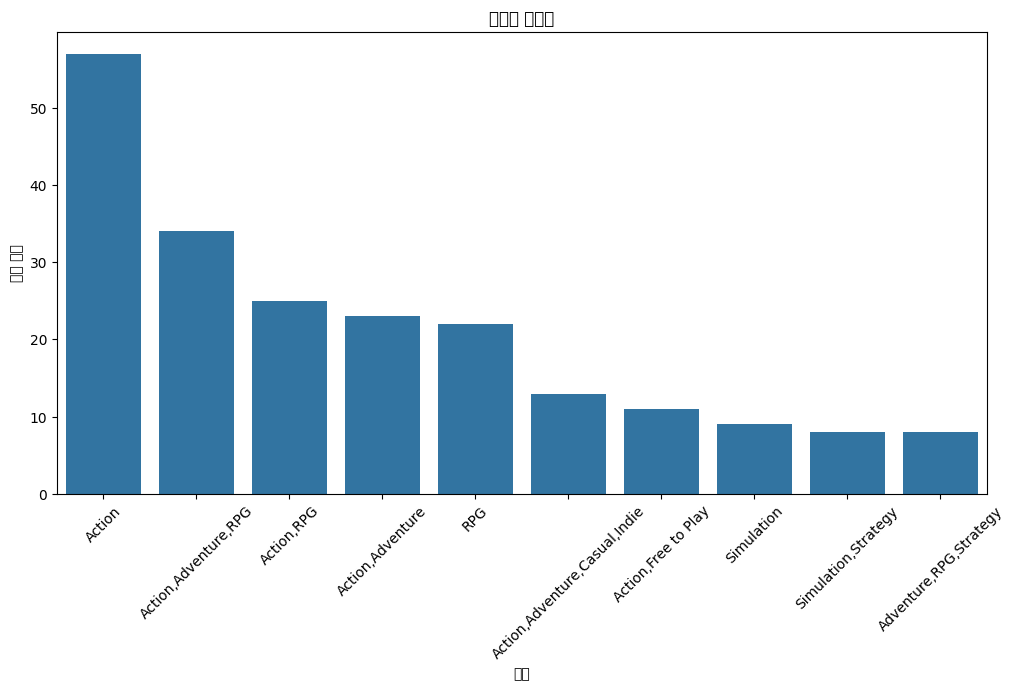

DataFrame 2:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

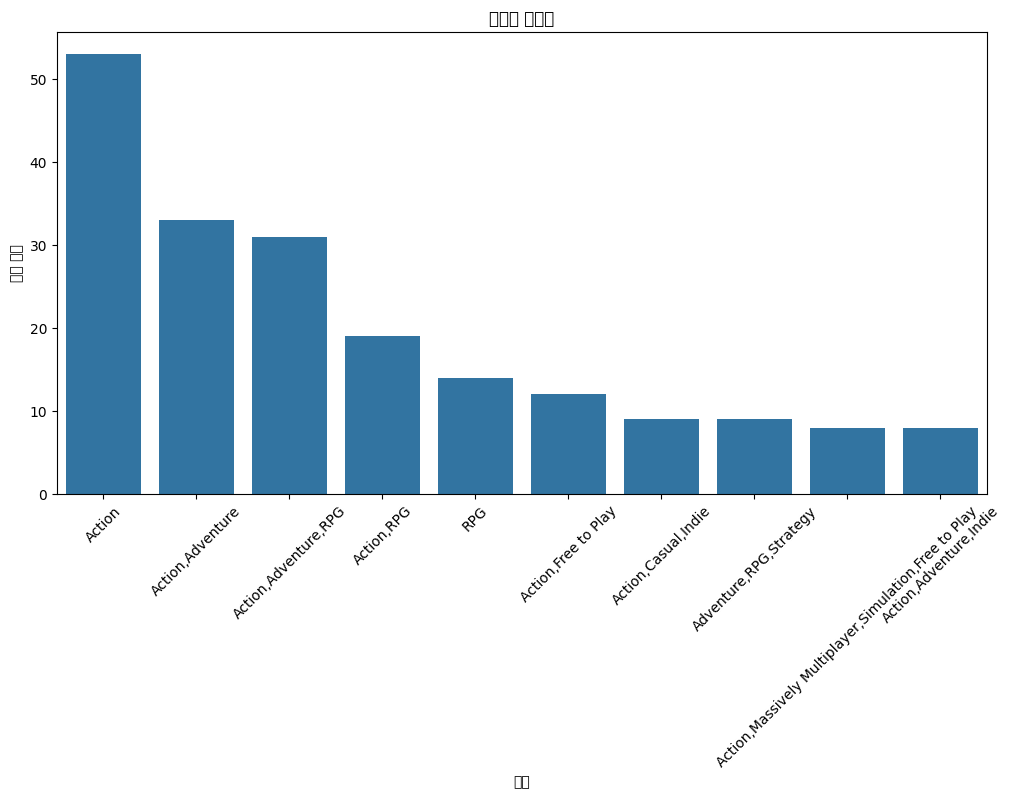

DataFrame 3:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

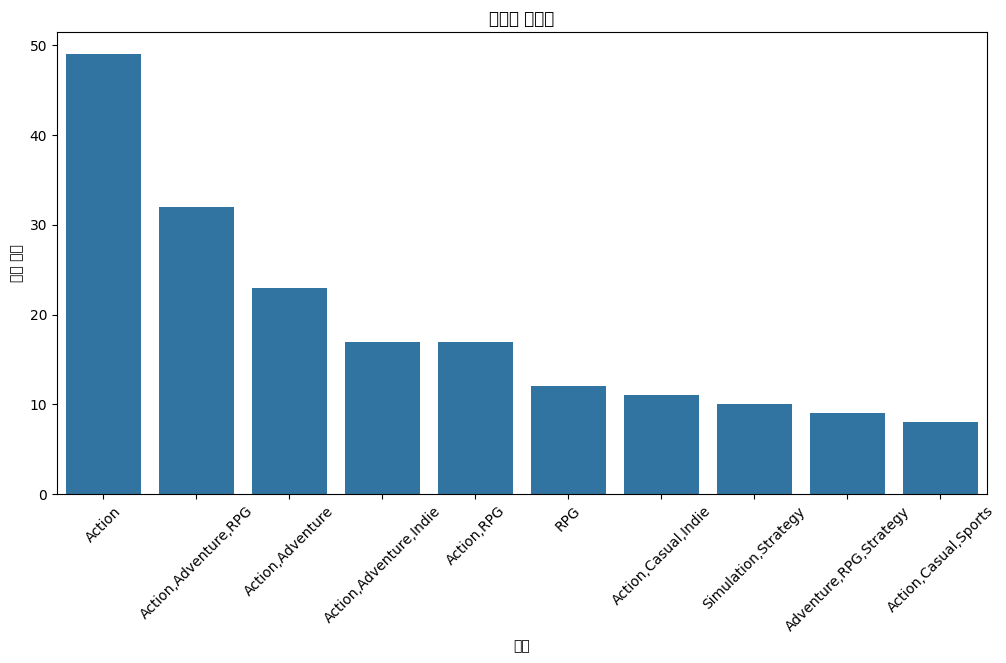

DataFrame 4:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

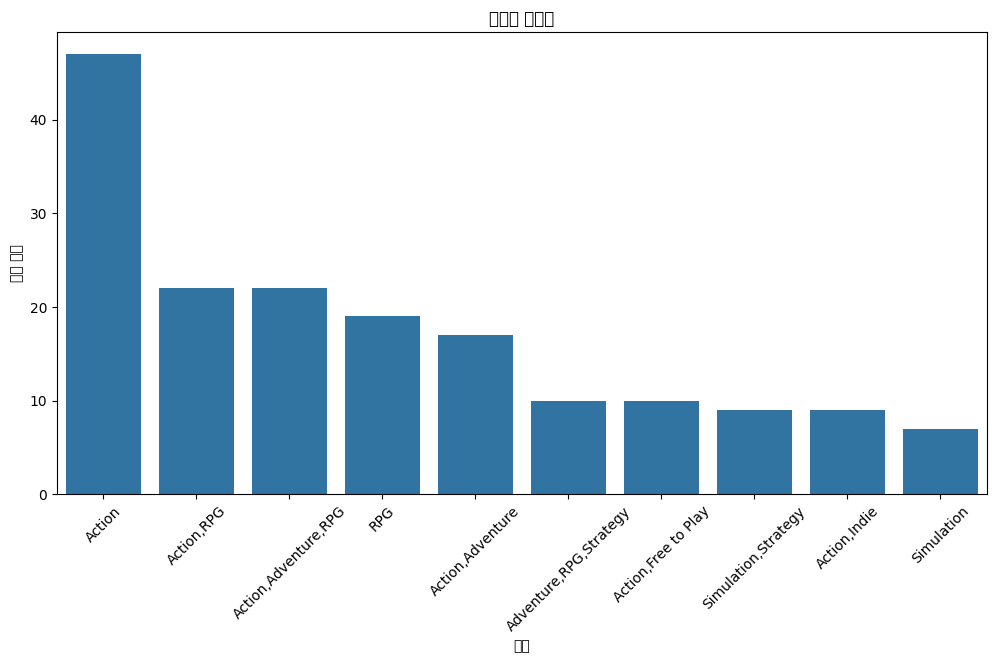

DataFrame 5:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

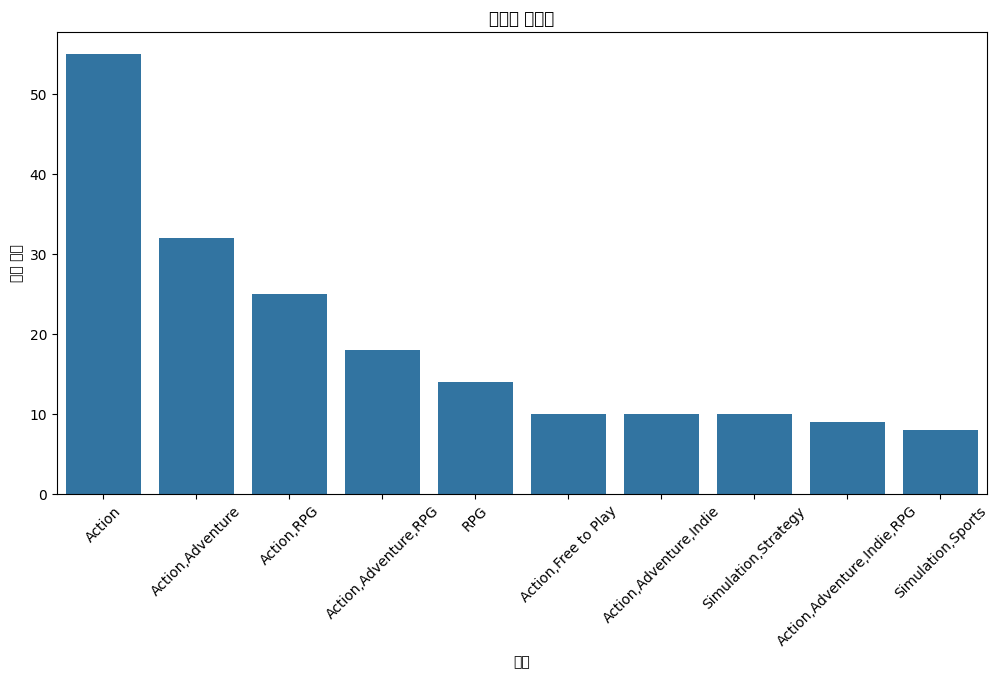

DataFrame 6:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

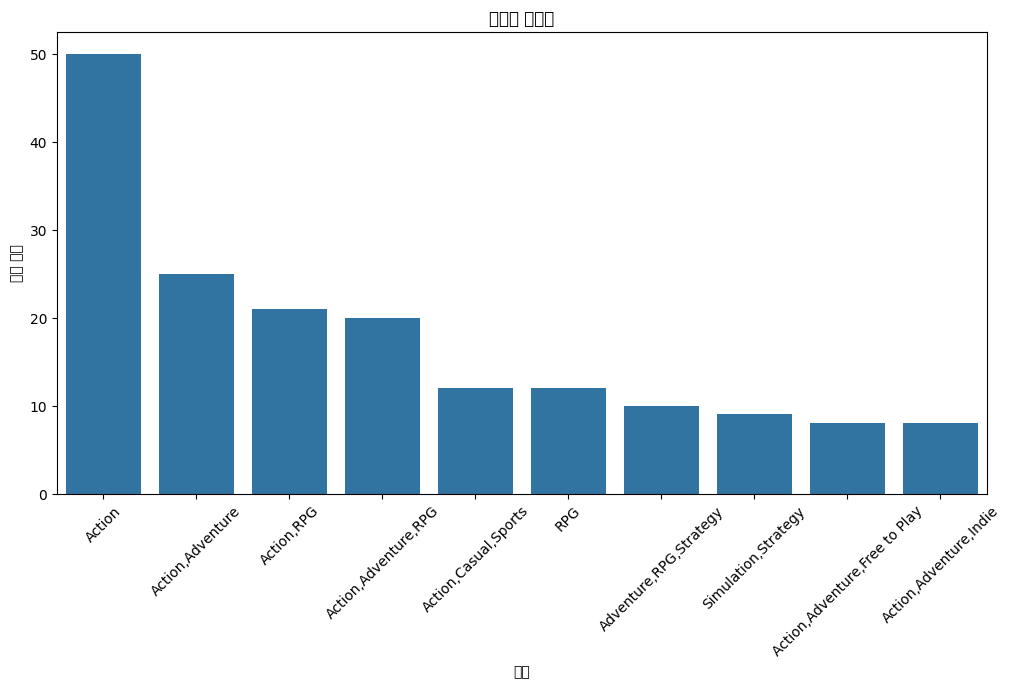

DataFrame 7:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

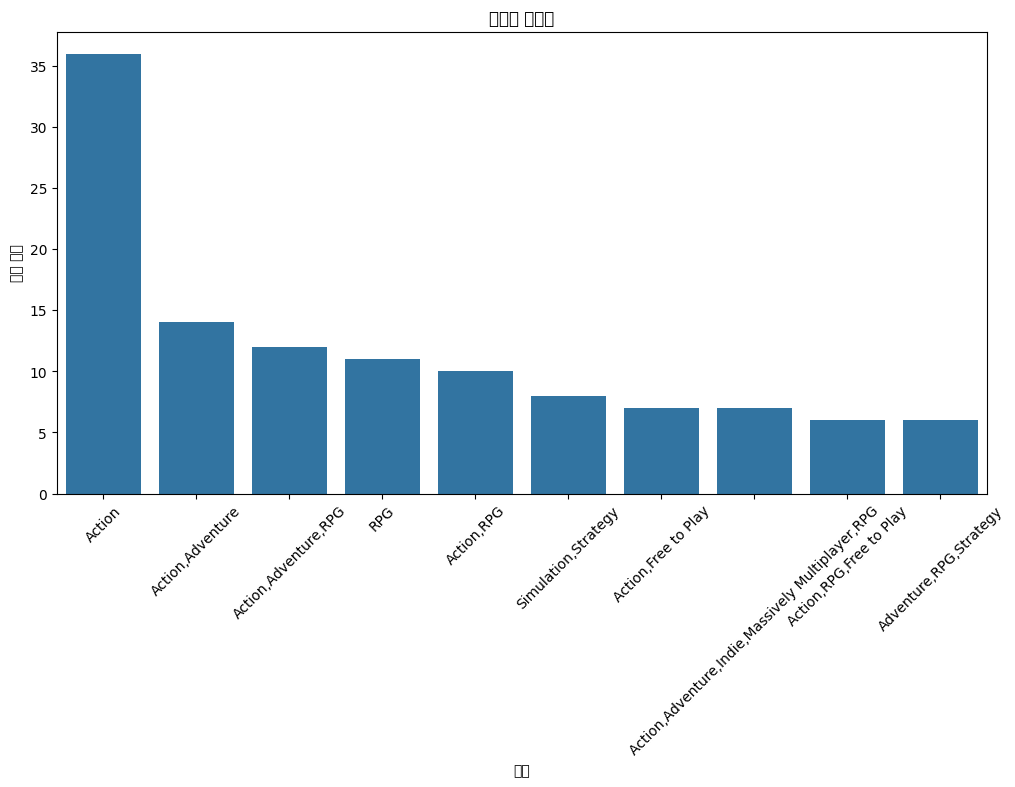

DataFrame 8:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

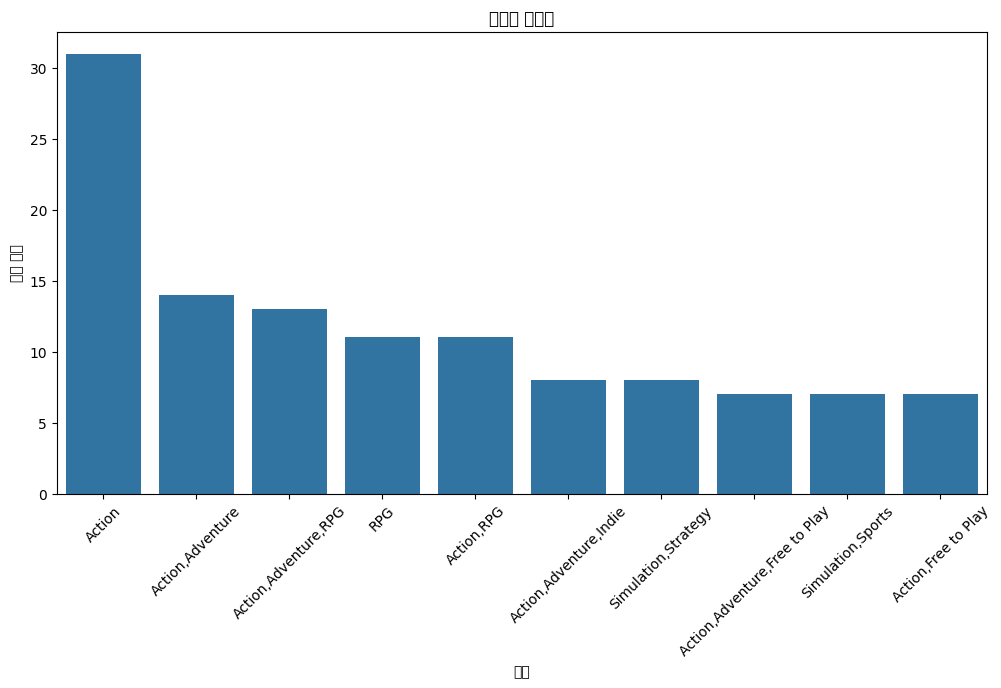

DataFrame 9:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

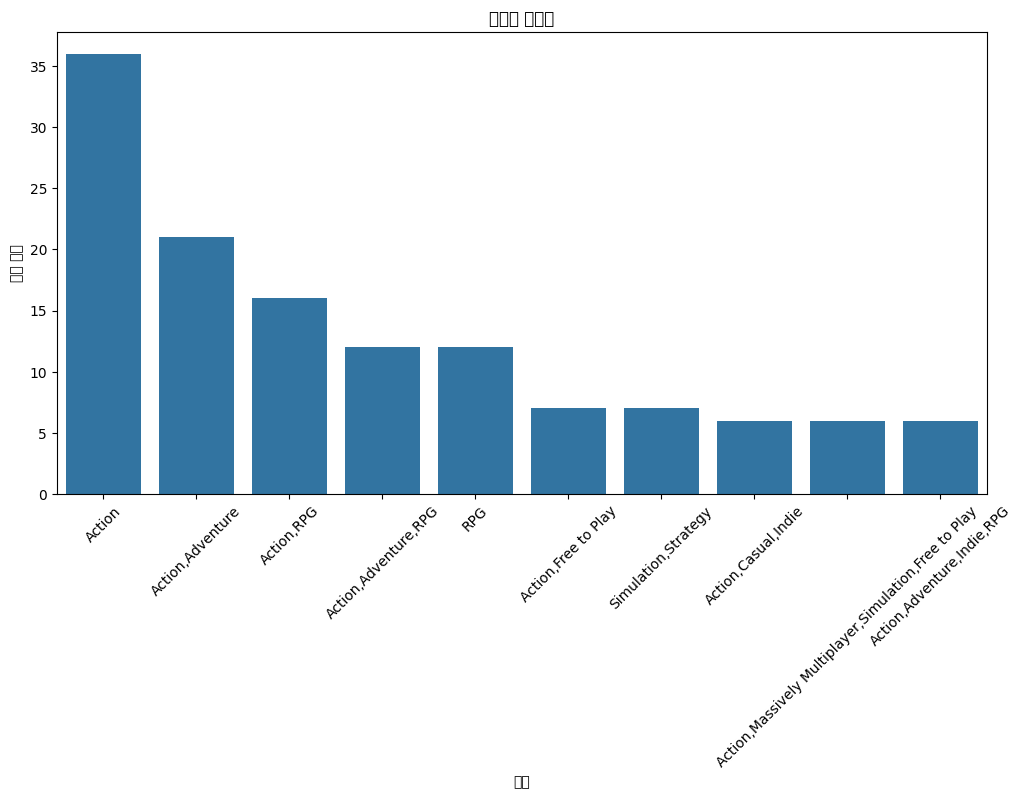

In [559]:

# 데이터프레임을 담은 리스트
dataframes = [FebruaryJapandata, FebruaryChinadata, FebruaryKoreadata,
              MarchJapandata, MarchChinadata, MarchKoreadata,
              AprilJapandata, AprilKoreadata, AprilChinadata]

#for문
for i, df in enumerate(dataframes, start=1):
    print(f"DataFrame {i}:")
    # 상위 10개 장르 추출
    top_10_genres = df['장르'].value_counts().head(10)

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_genres.index, y=top_10_genres)
    plt.xlabel('장르')
    plt.ylabel('출연 빈도')
    plt.title('장르별 점유율')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.show()